In [1]:
import pandas as pd
import numpy as np
from datetime import date,datetime
import requests
import json
from config import *
import matplotlib.pyplot as plt 
df = pd.read_csv(processed_data_dir + "merged.csv")

In [2]:
future = pd.read_csv("data/weather/future.csv")
past = pd.read_csv("data/weather/past.csv")

In [6]:
future = future.drop(["PV power", "Solar radiation","Wind power","Wind speed"], axis=1)

In [8]:
future.rename(columns = {'Temperature':'future'}, inplace = True)

In [10]:
past = past.drop(["PV power", "Solar radiation","Wind power","Wind speed"], axis=1)

In [11]:
past.rename(columns = {'Temperature':'past'}, inplace = True)

In [13]:
df = future

In [15]:
df = df.merge(past, on="Time", how="left")

In [17]:
df.dropna(inplace = True)

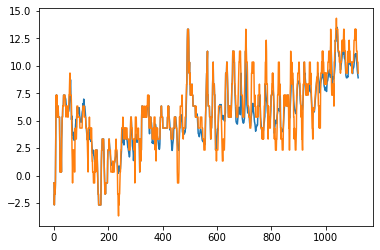

In [19]:
plt.plot(df["future"])
plt.plot(df["past"])

In [20]:
((df.future - df.past) ** 2).mean() ** .5

1.2918115740529432

In [26]:
df = pd.read_csv("data/weather/futute_vs_past.csv")

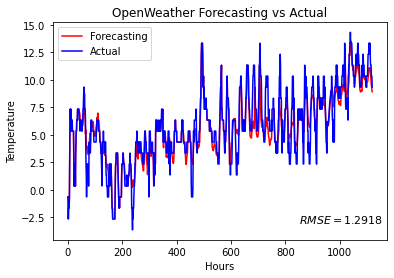

In [49]:
plt.plot(df["future"], "r",  label='Forecasting')
plt.plot(df["past"], "b", label='Actual')
plt.title('OpenWeather Forecasting vs Actual') # set the title
plt.ylabel('Temperature')  # set the y label
plt.xlabel('Hours')  # set the x label
plt.legend(loc='upper left') # set the legend
plt.text(850, -3, '$RMSE = 1.2918$', fontsize = 11)
plt.savefig('overleaf_fig/OpenWeather_RMSE.png', format='png')